In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

2022-11-23 16:42:06.429664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 16:42:06.823725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-23 16:42:06.823743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-23 16:42:06.879268: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-23 16:42:08.050007: W tensorflow/stream_executor/platform/de

In [2]:
wine_data = pd.read_csv('Wines.csv')

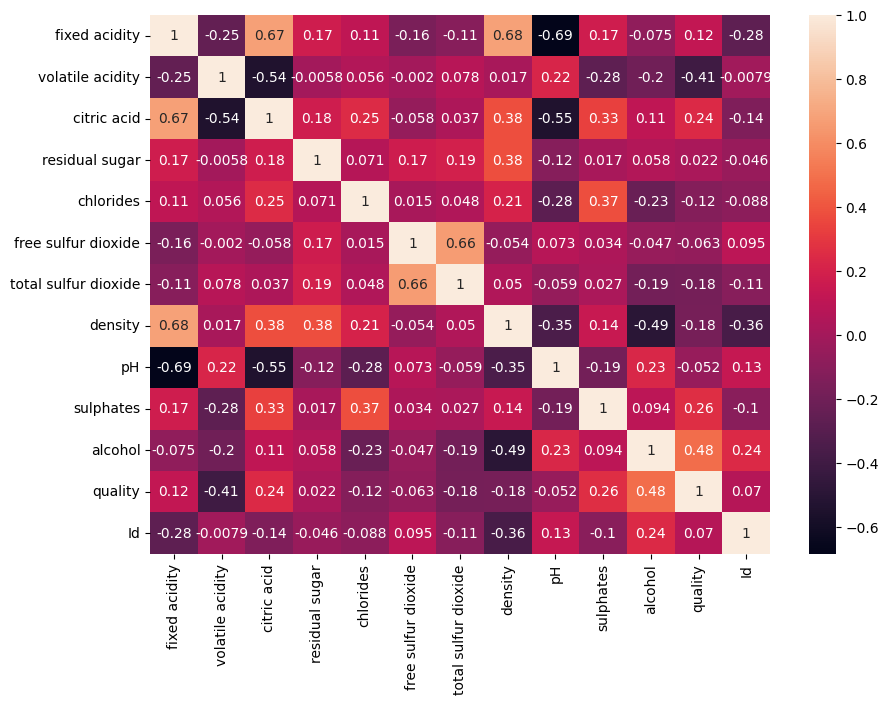

In [6]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(wine_data.corr() , annot = True , ax = ax)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_data)
model.fit(x, wine_data.quality)
display(model.feature_importances_)

array([0.04952678, 0.12061187, 0.04753618, 0.04129022, 0.04948515,
       0.0410233 , 0.06682778, 0.04562811, 0.05130166, 0.13530718,
       0.29243305, 0.05902872])

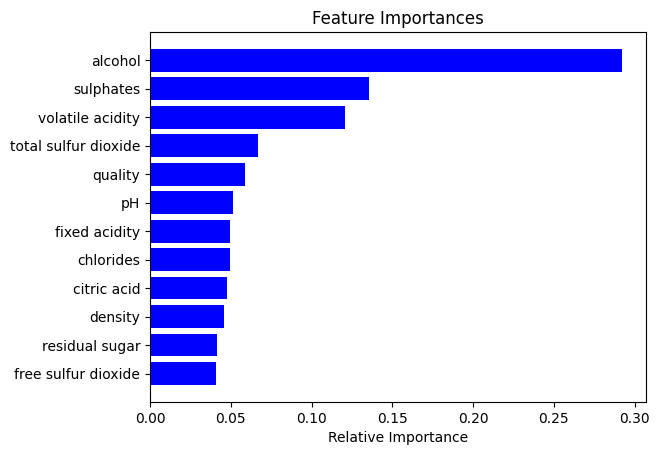

In [8]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [9]:
del x['fixed acidity']
del x['free sulfur dioxide']
del x['citric acid']

In [10]:
le = LabelEncoder()
y = le.fit_transform(wine_data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [12]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

strategy = {0:1700, 1:1700, 2:1700, 3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

     |████████████████████████████████| 199 kB 1.4 MB/s eta 0:00:01


/home/cytech/.virtualenvs/IA/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1)
  warnings.warn(
/home/cytech/.virtualenvs/IA/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1)
  warnings.warn(
/home/cytech/.virtualenvs/IA/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 2 will be larger than the number of samples in the majority class (class #0 -> 1)
  warnings.warn(
/home/cytech/.virtualenvs/IA/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 3 will be larger than the number of samples in 

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [13]:
x.shape

(1143, 9)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

IndexError: index 1050 is out of bounds for axis 1 with size 5

In [17]:
ann = tf.keras.models.Sequential(layers = None , name = None)

2022-11-23 16:51:09.781811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-23 16:51:09.782741: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-23 16:51:09.783224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student-laptop): /proc/driver/nvidia/version does not exist
2022-11-23 16:51:09.785599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
ann.add(tf.keras.layers.Input(shape = 8,))

In [19]:
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))

In [20]:
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))

In [21]:
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [23]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [24]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

NameError: name 'y_train_cat' is not defined